## Problem statement
A retail company “ABC Private Limited” wants to understand the customer purchase behavior (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city type, stayincurrentcity), product details (productid and product category), and Total purchase amount from last month.

Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#importing data set
train = pd.read_csv('train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
test = pd.read_csv('test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [12]:
# combining two datasets
df = train.append(test)
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14308\2970905044.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


- there are 12 columns are there

In [14]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


since User_Id having all Unique values and for model we can't use it

In [18]:
df.drop(['User_ID'],axis=1,inplace=True)

In [19]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


#### Data preprocessing

In [25]:
df.isnull().mean()

Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.313886
Product_Category_3            0.696481
Purchase                      0.298085
dtype: float64

In [23]:
df.duplicated().sum()

15967

In [26]:
#lets check with categorical variables
#handling categorical feature with gender
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)
df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [27]:
#handling categorical feature 'age'"
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [29]:
df['Age'].value_counts().sort_values()

0-17      21334
55+       30579
51-55     54784
46-50     65278
18-25    141953
36-45    156724
26-35    313015
Name: Age, dtype: int64

here we should not convert them into dummies needed some domain knowledge
here is an example for Target encoding

dont keep as zero started one for mathematical caluculation

In [30]:
df['Age'] = df['Age'].map({
    '0-17':1,
    '18-25':2,
    '26-35':3,
    '36-45':4,
    '46-50':5,
    '51-55':6,
    '55+':7
})

In [31]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


### another process of encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
#create label encoder object
le  = LabelEncoder()
#encoding labels
train['Age'] = le.fit_transform(train['Age'])
train['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [36]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [46]:
len(df.City_Category)

783667

In [48]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [49]:
df_city_cat = pd.get_dummies(df['City_Category'],drop_first=True)
df_city_cat.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [50]:
df = pd.concat([df,df_city_cat],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [51]:
#dropping city category
df.drop(['City_Category'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [53]:
#lets check missing values
df.isnull().mean()

Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.313886
Product_Category_3            0.696481
Purchase                      0.298085
B                             0.000000
C                             0.000000
dtype: float64

product_categories have so many null values along with the purchase

In [55]:
#focus on replacing missing values
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [57]:
df.Product_Category_2.value_counts().sort_index()

2.0     70498
3.0      4123
4.0     36705
5.0     37165
6.0     23575
7.0       854
8.0     91317
9.0      8177
10.0     4420
11.0    20230
12.0     7801
13.0    15054
14.0    78834
15.0    54114
16.0    61687
17.0    19104
18.0     4027
Name: Product_Category_2, dtype: int64

<AxesSubplot:>

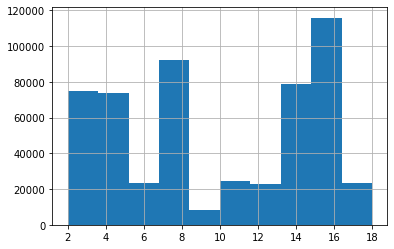

In [58]:
#replace the missing values with mode
df.Product_Category_2.hist()

In [59]:
df.Product_Category_2 = df.Product_Category_2.fillna(df.Product_Category_2.mode()[0])

In [60]:
df.Product_Category_2.isnull().sum()

0

In [62]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [61]:

df.Product_Category_3.value_counts().sort_index()

3.0       878
4.0      2691
5.0     23799
6.0      6888
8.0     17861
9.0     16532
10.0     2501
11.0     2585
12.0    13115
13.0     7849
14.0    26283
15.0    39968
16.0    46469
17.0    23818
18.0     6621
Name: Product_Category_3, dtype: int64

In [63]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [65]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [66]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [70]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+',4)

In [72]:
df.Stay_In_Current_City_Years.value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  uint8  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(4), object(2), uint8(3)
memory usage: 78.2+ MB


In [76]:
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.astype('int')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  uint8  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(4), object(1), uint8(3)
memory usage: 75.

In [78]:
df.B = df.B.astype(int)
df.C = df.C.astype(int)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  uint8  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(4), object(1), uint8(1)
memory usage: 79.

In [82]:
df.duplicated().sum()

15967

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

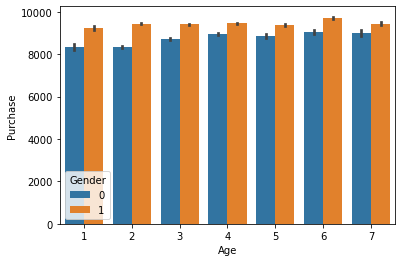

In [84]:
sns.barplot('Age','Purchase',hue='Gender',data=df)

-  Percentage of purchase of goods men is high than women
- all other purchase w.r.to age is same

In [85]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

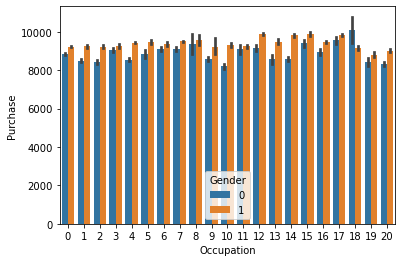

In [88]:
#visulaization of purchase with occuption
sns.barplot('Occupation','Purchase',data=df,hue='Gender')

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


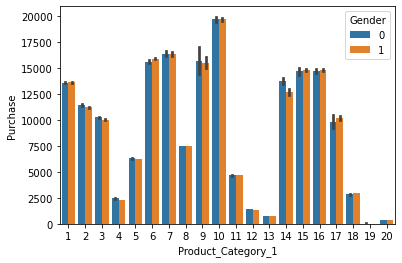

In [89]:
sns.barplot('Product_Category_1','Purchase',data=df,hue='Gender');

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


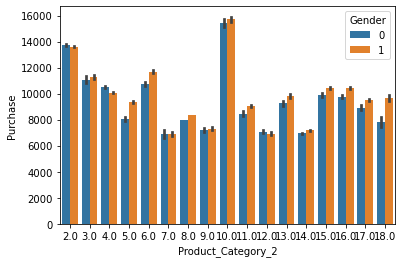

In [90]:
sns.barplot('Product_Category_2','Purchase',data=df,hue='Gender');

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


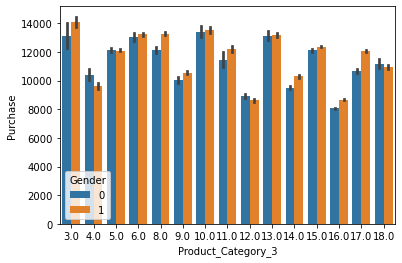

In [91]:
sns.barplot('Product_Category_3','Purchase',data=df,hue='Gender');

In [93]:
df.duplicated().sum()

15967

In [94]:
df.drop_duplicates(inplace=True)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767700 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  767700 non-null  object 
 1   Gender                      767700 non-null  uint8  
 2   Age                         767700 non-null  int64  
 3   Occupation                  767700 non-null  int64  
 4   Stay_In_Current_City_Years  767700 non-null  int32  
 5   Marital_Status              767700 non-null  int64  
 6   Product_Category_1          767700 non-null  int64  
 7   Product_Category_2          767700 non-null  float64
 8   Product_Category_3          767700 non-null  float64
 9   Purchase                    549955 non-null  float64
 10  B                           767700 non-null  int32  
 11  C                           767700 non-null  int32  
dtypes: float64(3), int32(3), int64(4), object(1), uint8(1)
memory usage: 62.

In [96]:
df.drop(['Product_ID'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767700 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      767700 non-null  uint8  
 1   Age                         767700 non-null  int64  
 2   Occupation                  767700 non-null  int64  
 3   Stay_In_Current_City_Years  767700 non-null  int32  
 4   Marital_Status              767700 non-null  int64  
 5   Product_Category_1          767700 non-null  int64  
 6   Product_Category_2          767700 non-null  float64
 7   Product_Category_3          767700 non-null  float64
 8   Purchase                    549955 non-null  float64
 9   B                           767700 non-null  int32  
 10  C                           767700 non-null  int32  
dtypes: float64(3), int32(3), int64(4), uint8(1)
memory usage: 56.4 MB


In [101]:
df_train = df[df.Purchase.isnull()]

In [102]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [104]:
X = df_train.drop('Purchase',axis=1)
y = df_train['Purchase']
print("x shape", X.shape)
print("y shape", y.shape)

x shape (217745, 10)
y shape (217745,)


In [105]:
#splitting data into train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print("x_train",X_train.shape)
print("y_train",y_train.shape)


x_train (145889, 10)
y_train (145889,)


In [106]:
print("x_test",X_test.shape)
print("y_test",y_test.shape)

x_test (71856, 10)
y_test (71856,)


### Feature scaling

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [111]:
X_train_sc

array([[ 0.585854  , -0.39753545, -1.24412261, ...,  0.36502973,
         1.17464972, -0.66896379],
       [ 0.585854  ,  1.07103498, -0.93930601, ...,  0.36502973,
        -0.85131762,  1.49484922],
       [ 0.585854  ,  1.8053202 , -1.09171431, ...,  0.36502973,
         1.17464972, -0.66896379],
       ...,
       [ 0.585854  , -1.86610588,  0.27996036, ...,  0.73318104,
         1.17464972, -0.66896379],
       [ 0.585854  ,  0.33674977, -1.09171431, ...,  0.36502973,
         1.17464972, -0.66896379],
       [ 0.585854  , -1.86610588, -1.24412261, ..., -3.68463462,
        -0.85131762,  1.49484922]])

In [ ]:
## train model